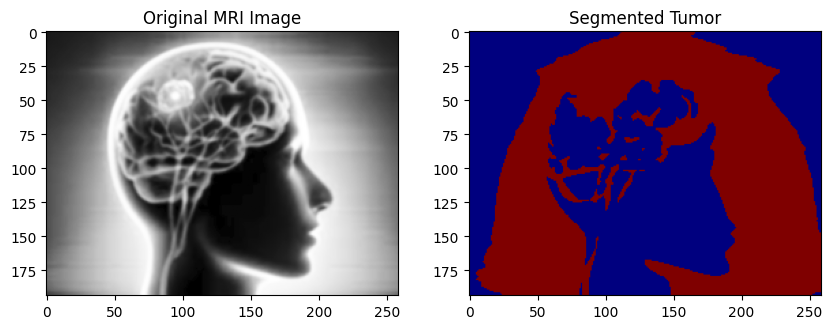

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess MRI image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    image = cv2.GaussianBlur(image, (5, 5), 0)  # Apply Gaussian blur to reduce noise
    image = cv2.equalizeHist(image)  # Enhance contrast
    return image

# Function to segment tumor using thresholding and contour detection
def segment_tumor(image_path):
    image = preprocess_image(image_path)

    # Apply adaptive thresholding
    _, thresholded = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create mask for tumor segmentation
    mask = np.zeros_like(image)
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

    return image, mask

# Function to visualize results
def visualize_results(image_path):
    original_image, segmented_mask = segment_tumor(image_path)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original MRI Image")
    plt.imshow(original_image, cmap="gray")

    plt.subplot(1, 2, 2)
    plt.title("Segmented Tumor")
    plt.imshow(segmented_mask, cmap="jet")

    plt.show()

# Example usage
image_path ="/content/download (1).jpeg"  # Replace with actual MRI image path
visualize_results(image_path)

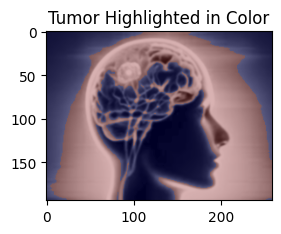

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess MRI image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    image = cv2.GaussianBlur(image, (5, 5), 0)  # Reduce noise
    image = cv2.equalizeHist(image)  # Enhance contrast
    return image

# Function to segment tumor using thresholding and contour detection
def segment_tumor(image_path):
    image = preprocess_image(image_path)

    # Apply adaptive thresholding
    _, thresholded = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create mask for tumor segmentation
    mask = np.zeros_like(image)
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

    return image, mask

# Function to change tumor color
def change_tumor_color(image_path):
    original_image, segmented_mask = segment_tumor(image_path)

    # Convert grayscale image to BGR
    color_image = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)

    # Apply a color map to the segmented tumor
    colored_mask = cv2.applyColorMap(segmented_mask, cv2.COLORMAP_JET)

    # Overlay the colored mask onto the original image
    overlay = cv2.addWeighted(color_image, 0.7, colored_mask, 0.3, 0)

    return original_image, overlay

# Function to visualize results
def visualize_results(image_path):
    original_image, colored_tumor_image = change_tumor_color(image_path)


    plt.subplot(1, 2, 2)
    plt.title("Tumor Highlighted in Color")
    plt.imshow(cv2.cvtColor(colored_tumor_image, cv2.COLOR_BGR2RGB))

    plt.show()

# Example usage
image_path = "/content/download (1).jpeg"  # Replace with actual MRI image path
visualize_results(image_path)

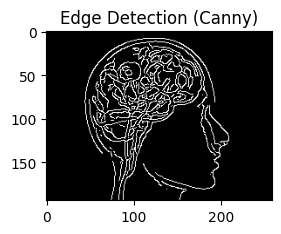

In [4]:


# Function to preprocess MRI image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    image = cv2.GaussianBlur(image, (5, 5), 0)  # Apply Gaussian blur to reduce noise
    image = cv2.equalizeHist(image)  # Enhance contrast
    return image

# Function to detect edges using Canny Edge Detection
def detect_edges(image_path):
    image = preprocess_image(image_path)

    # Apply Canny edge detection
    edges = cv2.Canny(image, threshold1=50, threshold2=150)

    return image, edges

# Function to visualize results
def visualize_results(image_path):
    original_image, edge_detected_image = detect_edges(image_path)


    plt.subplot(1, 2, 2)
    plt.title("Edge Detection (Canny)")
    plt.imshow(edge_detected_image, cmap="gray")

    plt.show()

# Example usage
image_path = "/content/download (1).jpeg"  # Replace with actual MRI image path
visualize_results(image_path)

Edge detection test passed successfully!


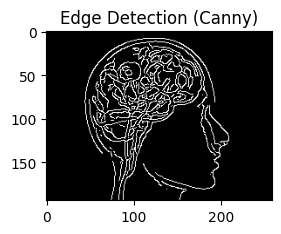

In [5]:


# Function to preprocess MRI image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    image = cv2.GaussianBlur(image, (5, 5), 0)  # Apply Gaussian blur to reduce noise
    image = cv2.equalizeHist(image)  # Enhance contrast
    return image

# Function to detect edges using Canny Edge Detection
def detect_edges(image_path):
    image = preprocess_image(image_path)

    # Apply Canny edge detection
    edges = cv2.Canny(image, threshold1=50, threshold2=150)

    return image, edges

# Function to test edge detection
def test_edge_detection(image_path):
    original_image, edge_detected_image = detect_edges(image_path)

    # Check if the output is a valid image
    assert original_image is not None, "Error: Original image not loaded correctly."
    assert edge_detected_image is not None, "Error: Edge detection failed."

    # Check if the edge-detected image has the same dimensions as the original
    assert original_image.shape == edge_detected_image.shape, "Error: Image dimensions mismatch."

    print("Edge detection test passed successfully!")



    plt.subplot(1, 2, 2)
    plt.title("Edge Detection (Canny)")
    plt.imshow(edge_detected_image, cmap="gray")

    plt.show()

# Example usage
image_path = "/content/download (1).jpeg"  # Replace with actual MRI image path
test_edge_detection(image_path)

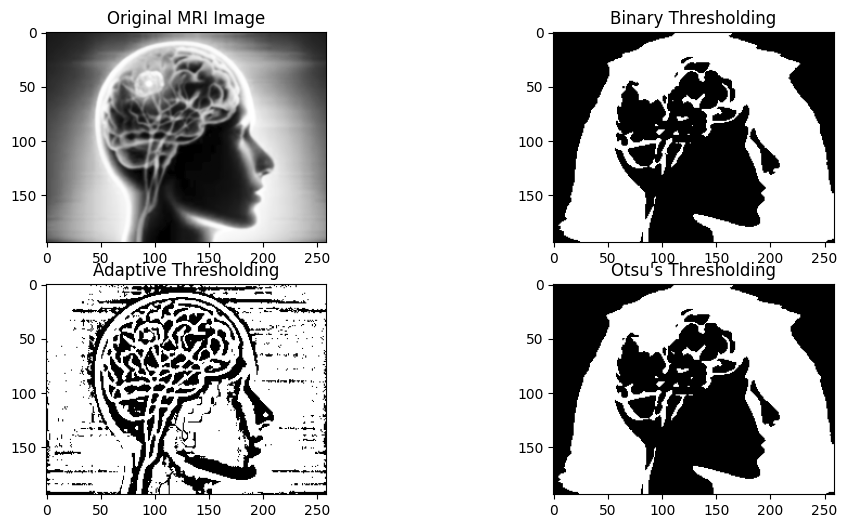

In [7]:


# Function to preprocess MRI image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    image = cv2.GaussianBlur(image, (5, 5), 0)  # Apply Gaussian blur to reduce noise
    image = cv2.equalizeHist(image)  # Enhance contrast
    return image

# Function to apply different thresholding techniques
def apply_thresholding(image_path):
    image = preprocess_image(image_path)

    # Simple Binary Thresholding
    _, binary_thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Adaptive Thresholding (Gaussian)
    adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY, 11, 2)

    # Otsu's Thresholding (Automatic threshold selection)
    _, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return image, binary_thresh, adaptive_thresh, otsu_thresh

# Function to visualize results
def visualize_results(image_path):
    original_image, binary_thresh, adaptive_thresh, otsu_thresh = apply_thresholding(image_path)

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.title("Original MRI Image")
    plt.imshow(original_image, cmap="gray")

    plt.subplot(2, 2, 2)
    plt.title("Binary Thresholding")
    plt.imshow(binary_thresh, cmap="gray")

    plt.subplot(2, 2, 3)
    plt.title("Adaptive Thresholding")
    plt.imshow(adaptive_thresh, cmap="gray")

    plt.subplot(2, 2, 4)
    plt.title("Otsu's Thresholding")
    plt.imshow(otsu_thresh, cmap="gray")

    plt.show()

# Example usage
image_path = "/content/download (1).jpeg"  # Replace with actual MRI image path
visualize_results(image_path)

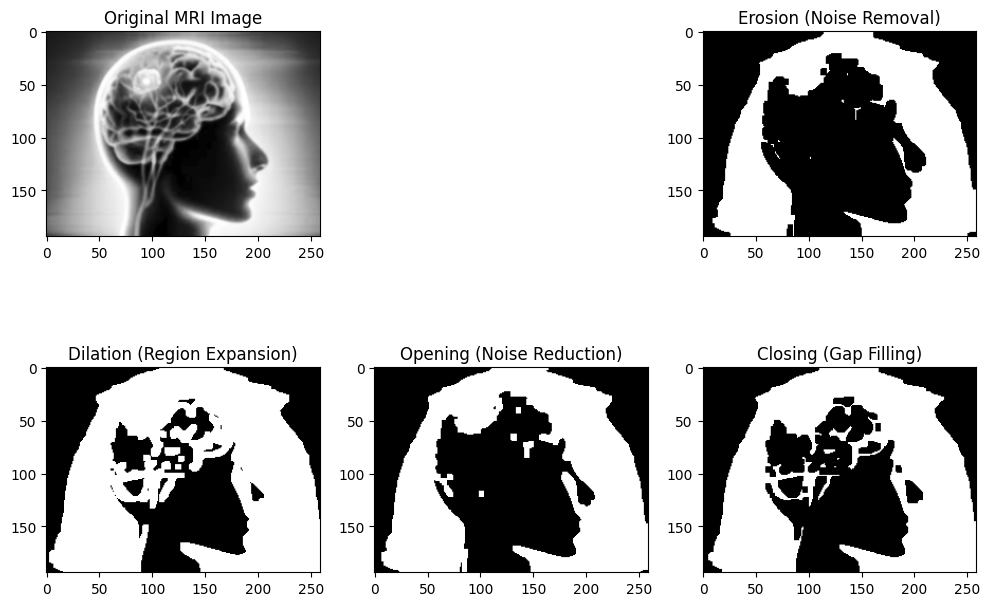

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess MRI image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    image = cv2.GaussianBlur(image, (5, 5), 0)  # Apply Gaussian blur to reduce noise
    image = cv2.equalizeHist(image)  # Enhance contrast
    return image

# Function to apply thresholding
def apply_thresholding(image):
    _, binary_thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_thresh

# Function to apply morphological operations
def apply_morphological_operations(image_path):
    image = preprocess_image(image_path)
    thresholded = apply_thresholding(image)

    # Define kernel for morphological operations
    kernel = np.ones((5, 5), np.uint8)

    # Apply morphological operations
    erosion = cv2.erode(thresholded, kernel, iterations=1)  # Removes small noise
    dilation = cv2.dilate(thresholded, kernel, iterations=1)  # Expands tumor regions
    opening = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)  # Removes noise (erosion followed by dilation)
    closing = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)  # Fills gaps (dilation followed by erosion)

    return image, thresholded, erosion, dilation, opening, closing

# Function to visualize results
def visualize_results(image_path):
    original_image, thresholded, erosion, dilation, opening, closing = apply_morphological_operations(image_path)

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.title("Original MRI Image")
    plt.imshow(original_image, cmap="gray")


    plt.subplot(2, 3, 3)
    plt.title("Erosion (Noise Removal)")
    plt.imshow(erosion, cmap="gray")

    plt.subplot(2, 3, 4)
    plt.title("Dilation (Region Expansion)")
    plt.imshow(dilation, cmap="gray")

    plt.subplot(2, 3, 5)
    plt.title("Opening (Noise Reduction)")
    plt.imshow(opening, cmap="gray")

    plt.subplot(2, 3, 6)
    plt.title("Closing (Gap Filling)")
    plt.imshow(closing, cmap="gray")

    plt.show()

# Example usage
image_path = "/content/download (1).jpeg"  # Replace with actual MRI image path
visualize_results(image_path)

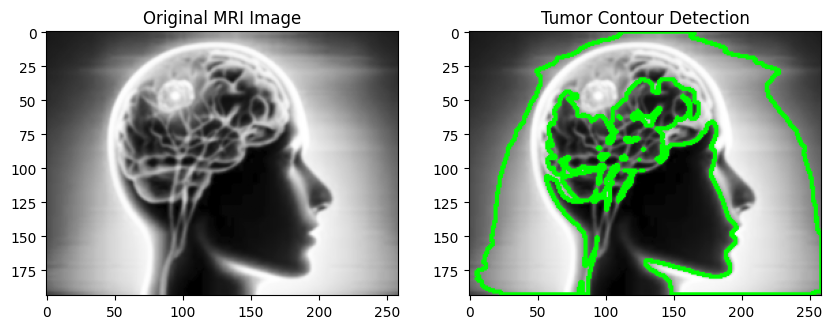

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess MRI image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    image = cv2.GaussianBlur(image, (5, 5), 0)  # Apply Gaussian blur to reduce noise
    image = cv2.equalizeHist(image)  # Enhance contrast
    return image

# Function to detect contours in the tumor region
def detect_contours(image_path):
    image = preprocess_image(image_path)

    # Apply thresholding to segment tumor
    _, thresholded = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours
    contours, hierarchy = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    contour_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Draw contours in green

    return image, contour_image

# Function to visualize results
def visualize_results(image_path):
    original_image, contour_detected_image = detect_contours(image_path)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original MRI Image")
    plt.imshow(original_image, cmap="gray")

    plt.subplot(1, 2, 2)
    plt.title("Tumor Contour Detection")
    plt.imshow(cv2.cvtColor(contour_detected_image, cv2.COLOR_BGR2RGB))

    plt.show()

# Example usage
image_path = "/content/download (1).jpeg"  # Replace with actual MRI image path
visualize_results(image_path)

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define a simple CNN model
class BrainTumorCNN(nn.Module):
    def __init__(self):
        super(BrainTumorCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 64 * 64, 128)
        self.fc2 = nn.Linear(128, 2)  # Binary classification (Tumor/No Tumor)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.flatten(x, start_dim=1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Generate random data (1000 samples, 3 channels, 64x64 image size)
num_samples = 1000
X_dummy = torch.randn(num_samples, 3, 64, 64)  # Random images
y_dummy = torch.randint(0, 2, (num_samples,))  # Random labels (0 or 1)

# Create a DataLoader
dataset = TensorDataset(X_dummy, y_dummy)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Initialize model, loss function, and optimizer
model = BrainTumorCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print("Training complete!")

Epoch [1/5], Loss: 0.6627
Epoch [2/5], Loss: 0.6856
Epoch [3/5], Loss: 0.6377
Epoch [4/5], Loss: 0.4264
Epoch [5/5], Loss: 0.0456
Training complete!
